In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv("Z:\ckdisease\kidney_disease.csv",)
df = df.replace('?', np.nan)
df = df.dropna(axis=0, how="any")
print("Total samples:", len(df))
print("Partial data\n", df.iloc[0:4, 0:6])

Total samples: 158
Partial data
     id   age    bp     sg   al   su
3    3  48.0  70.0  1.005  4.0  0.0
9    9  53.0  90.0  1.020  2.0  0.0
11  11  63.0  70.0  1.010  3.0  0.0
14  14  68.0  80.0  1.010  3.0  2.0


In [2]:
targets = df['classification'].astype('category')
label_color = ['red' if i=='ckd' else 'green' for i in targets]
print(label_color[0:3], label_color[-3:-1])

['red', 'red', 'red'] ['green', 'green']


In [3]:
targets = df['classification'].astype('category').cat.codes


In [4]:
categorical_ = ['rbc', 'pc', 'pcc', 'ba', 'htn',
        'dm', 'cad', 'appet', 'pe', 'ane'
        ]

In [5]:
df = df.drop(labels=['classification'], axis=1)
# drop using 'inplace' which is equivalent to df = df.drop()
df.drop(labels=categorical_, axis=1, inplace=True)
print("Partial data\n", df.iloc[0:4, 0:6]) # print partial data

Partial data
     id   age    bp     sg   al   su
3    3  48.0  70.0  1.005  4.0  0.0
9    9  53.0  90.0  1.020  2.0  0.0
11  11  63.0  70.0  1.010  3.0  0.0
14  14  68.0  80.0  1.010  3.0  2.0


In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)

In [8]:
pca.fit(df)
T = pca.transform(df) 
T = pd.DataFrame(T)


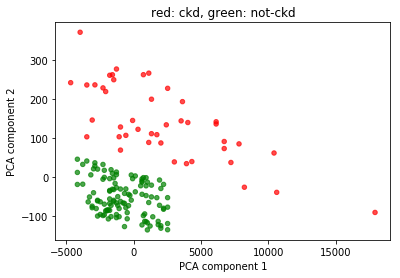

In [9]:
T.columns = ['PCA component 1', 'PCA component 2']
T.plot.scatter(x='PCA component 1', y='PCA component 2', marker='o',
        alpha=0.7, # opacity
        color=label_color,
        title="red: ckd, green: not-ckd" )
plt.show()

In [10]:
from sklearn import preprocessing

In [11]:
df = preprocessing.StandardScaler().fit_transform(df)

C:\Users\NAVIN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\NAVIN\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


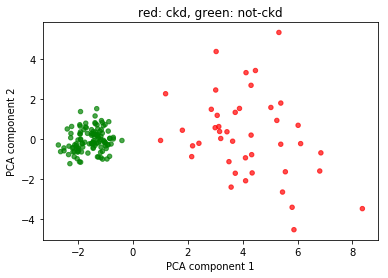

In [12]:
pca = PCA(n_components=2)
pca.fit(df)
pca.fit(df)
T = pca.transform(df) 
T = pd.DataFrame(T)

T.columns = ['PCA component 1', 'PCA component 2']
T.plot.scatter(x='PCA component 1', y='PCA component 2', marker='o',
        alpha=0.7, # opacity
        color=label_color,
        title="red: ckd, green: not-ckd" )
plt.show()

C:\Users\NAVIN\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\NAVIN\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


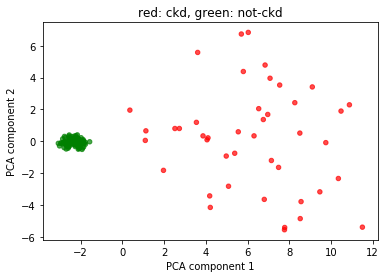

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

# create header for dataset

df = pd.read_csv("Z:\ckdisease\kidney_disease.csv",)
# dataset has '?' in it, convert these into NaN
df = df.replace('?', np.nan)
# drop the NaN
df = df.dropna(axis=0, how="any")

# print total samples
# print("Total samples:", len(df))
# print 4-rows and 6-columns
# print("Partial data\n", df.iloc[0:4, 0:6])

targets = df['classification'].astype('category')
# save target-values as color for plotting
# red: disease,  green: no disease
label_color = ['red' if i=='ckd' else 'green' for i in targets]
# print(label_color[0:3], label_color[-3:-1])

# list of categorical features
categorical_ = ['rbc', 'pc', 'pcc', 'ba', 'htn',
        'dm', 'cad', 'appet', 'pe', 'ane'
        ]

# drop the "categorical" features
# drop the classification column
df = df.drop(labels=['classification'], axis=1)
# drop using 'inplace' which is equivalent to df = df.drop()
# df.drop(labels=categorical_, axis=1, inplace=True)

# convert categorical features into dummy variable
df = pd.get_dummies(df, columns=categorical_)
# print("Partial data\n", df.iloc[0:4, 0:6]) # print partial data

# StandardScaler: mean=0, variance=1
df = preprocessing.StandardScaler().fit_transform(df)

pca = PCA(n_components=2)
pca.fit(df)
T = pca.transform(df) # transformed data
# change 'T' to Pandas-DataFrame to plot using Pandas-plots
T = pd.DataFrame(T)

# plot the data
T.columns = ['PCA component 1', 'PCA component 2']
T.plot.scatter(x='PCA component 1', y='PCA component 2', marker='o',
        alpha=0.7, # opacity
        color=label_color,
        title="red: ckd, green: not-ckd" )
plt.show()

In [14]:
from sklearn.pipeline import Pipeline

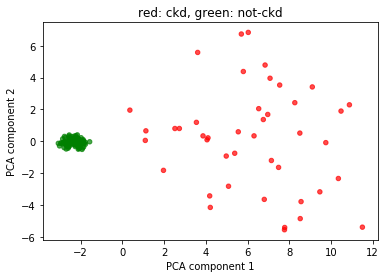

In [15]:
pca = Pipeline([
    ('scalar', preprocessing.StandardScaler()),
    ('dim_reduction', PCA(n_components=2))
    ])

pca.fit(df)
T = pca.transform(df) # transformed data
# change 'T' to Pandas-DataFrame to plot using Pandas-plots
T = pd.DataFrame(T)

# plot the data
T.columns = ['PCA component 1', 'PCA component 2']
T.plot.scatter(x='PCA component 1', y='PCA component 2', marker='o',
        alpha=0.7, # opacity
        color=label_color,
        title="red: ckd, green: not-ckd" )
plt.show()

In [16]:
from sklearn.cluster import KMeans

In [17]:
T = preprocessing.Normalizer().fit_transform(df)

In [18]:
n_clusters = 2

In [19]:
kmean_model = KMeans(n_clusters=n_clusters)
kmean_model.fit(T)
centroids, labels = kmean_model.cluster_centers_, kmean_model.labels_

In [20]:
 print(centroids)
print(labels)

[[ 0.16491371 -0.05770015 -0.05979215  0.15924593 -0.19243518 -0.10613378
  -0.1187828  -0.14063458 -0.14548918  0.1269482  -0.03081551  0.16857148
   0.16399463 -0.08135774  0.14248019 -0.12188398  0.12188398 -0.1611679
   0.1611679   0.10598811 -0.10598811  0.09745151 -0.09745151  0.17799303
  -0.17799303  0.15775449 -0.15775449  0.09298482 -0.09298482  0.12567352
  -0.12567352  0.12940464 -0.12940464  0.1141012  -0.1141012 ]
 [-0.14780872  0.05390974  0.05004733 -0.12897638  0.15657901  0.0721677
   0.0913569   0.10255095  0.10733711 -0.10354544  0.01425285 -0.13345524
  -0.13153186  0.07804089 -0.11134078  0.10068819 -0.10068819  0.11998303
  -0.11998303 -0.07114985  0.07114985 -0.06724385  0.06724385 -0.14004305
   0.14004305 -0.11990276  0.11990276 -0.06228603  0.06228603 -0.08892783
   0.08892783 -0.09036638  0.09036638 -0.07537863  0.07537863]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [21]:
from sklearn.decomposition import PCA

In [22]:
kmean_model = KMeans(n_clusters=n_clusters)
kmean_model.fit(T)
centroids, labels = kmean_model.cluster_centers_, kmean_model.labels_

In [23]:
pca_model = PCA(n_components=2)
pca_model.fit(T) # fit the model
T = pca_model.transform(T)

In [24]:
centroid_pca = pca_model.transform(centroids)
print(centroid_pca)

[[-0.37395623  0.00304851]
 [ 1.00011551 -0.008153  ]]


In [25]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'PCA analysis')

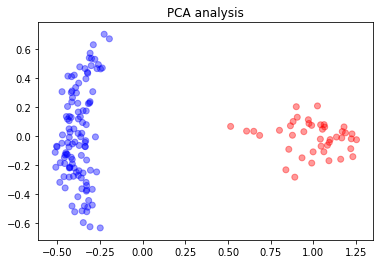

In [26]:
colors = ['blue', 'red', 'green', 'orange', 'black', 'brown']
features_colors = [ colors[labels[i]] 
for i in range(len(T)) ]
plt.scatter(T[:, 0], T[:, 1],c=features_colors, marker='o',alpha=0.4)
plt.title("PCA analysis")

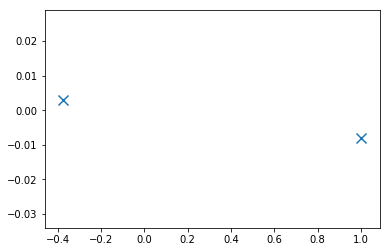

In [27]:
plt.scatter(centroid_pca[:, 0], centroid_pca[:, 1],marker='x', s=100,linewidths=3, )

In [28]:
xvector = pca_model.components_[0] * max(T[:,0])
yvector = pca_model.components_[1] * max(T[:,1])

In [29]:
df = pd.read_csv("Z:\ckdisease\kidney_disease.csv",)
# dataset has '?' in it, convert these into NaN
df = df.replace('?', np.nan)
# drop the NaN
df = df.dropna(axis=0, how="any")

# print total samples
# print("Total samples:", len(df))
# print 4-rows and 6-columns
# print("Partial data\n", df.iloc[0:4, 0:6])

targets = df['classification'].astype('category')
# save target-values as color for plotting
# red: disease,  green: no disease
label_color = ['red' if i=='ckd' else 'green' for i in targets]
# print(label_color[0:3], label_color[-3:-1])

# list of categorical features
categorical_ = ['rbc', 'pc', 'pcc', 'ba', 'htn',
        'dm', 'cad', 'appet', 'pe', 'ane'
        ]

# drop the "categorical" features
# drop the classification column
df = df.drop(labels=['classification'], axis=1)
df = pd.get_dummies(df, columns=categorical_)

In [30]:
columns = df.columns


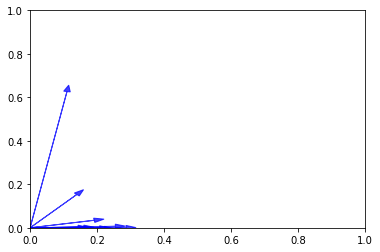

In [31]:
for i in range(len(columns)):
    # plot arrows
    plt.arrow(0, 0, xvector[i], yvector[i],
                color='b', width=0.0005,
                head_width=0.02, alpha=0.75
            )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CCA042128>,
      dtype=object)

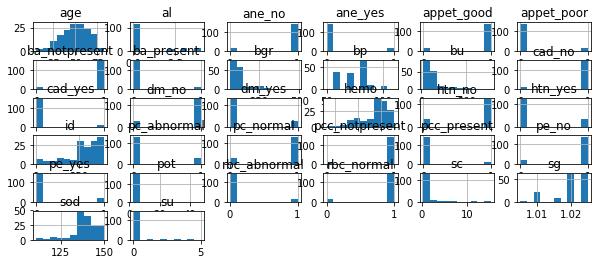

In [32]:

df.hist(figsize=(10,4))


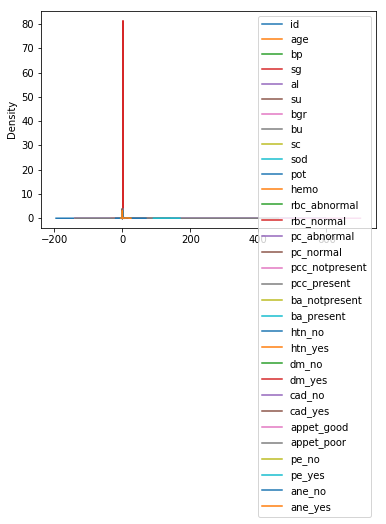

In [33]:

df.plot(kind='density',layout=(15,3))

In [34]:
df.plot(kind='box'))


SyntaxError: invalid syntax (<ipython-input-34-107271d5e7dd>, line 1)